In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('cleaned_data.csv')

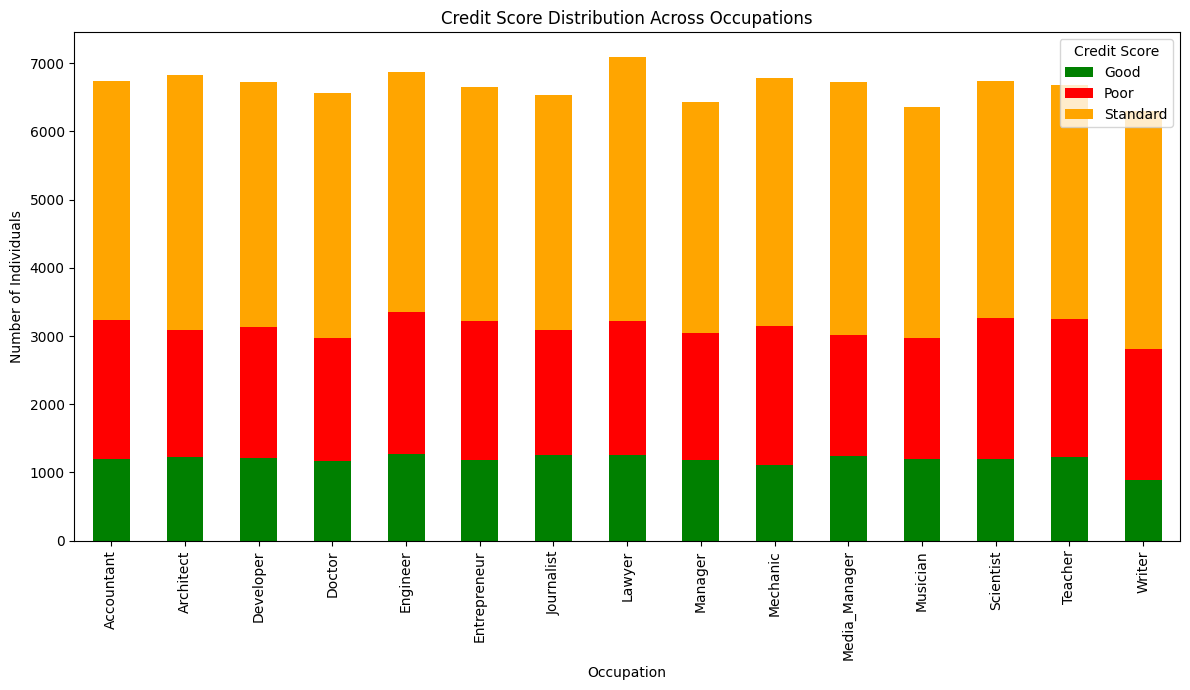

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'Occupation' and 'CreditScore' with your actual column names

# Aggregate the data by 'Occupation' and 'CreditScore'
occupation_credit_grouped = df.groupby(['Occupation', 'Credit_Score']).size().unstack(fill_value=0)

# Sort the data by a specific credit score category if needed, for example 'Good'
# occupation_credit_grouped = occupation_credit_grouped.sort_values(by='Good', ascending=False)
colors = ['green', 'red', 'orange']  # Good, Poor, Standard

# Plotting the stacked bar chart
occupation_credit_grouped.plot(kind='bar', stacked=True, color=colors, figsize=(12, 7))
plt.title('Credit Score Distribution Across Occupations')
plt.xlabel('Occupation')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.legend(title='Credit Score')
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()


C:\Users\20203672\AppData\Local\Temp\ipykernel_17048\891750494.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_credit_grouped = df.groupby(['AgeGroup', 'Credit_Score']).size().unstack(fill_value=0)


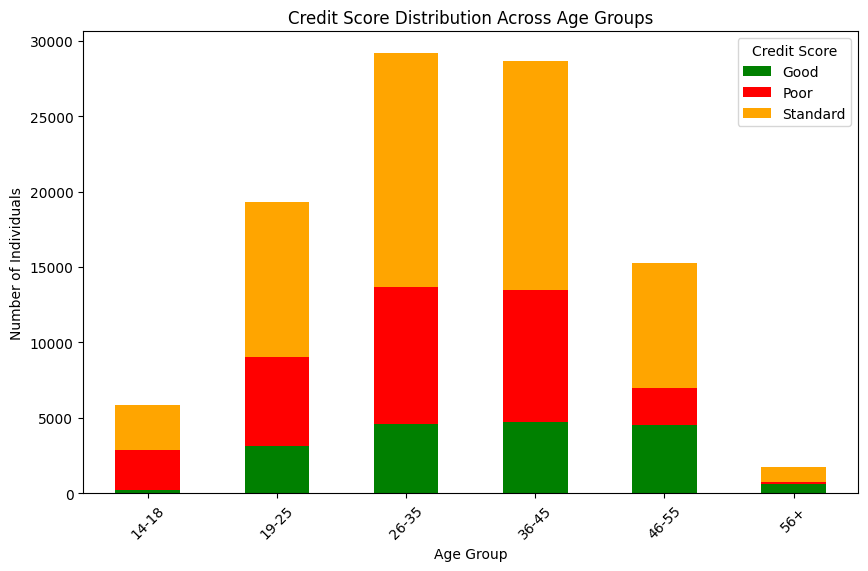

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Create age groups
bins = [14, 18, 25, 35, 45, 55, 57]  # Creating bins for the age groups
labels = ['14-18', '19-25', '26-35', '36-45', '46-55', '56+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Aggregate the data by 'AgeGroup' and 'CreditScore'
age_credit_grouped = df.groupby(['AgeGroup', 'Credit_Score']).size().unstack(fill_value=0)
colors = ['green', 'red', 'orange']  # Good, Poor, Standard

# Plotting the stacked bar chart with custom colors
age_credit_grouped.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))
plt.title('Credit Score Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Credit Score')
plt.show()

C:\Users\20203672\AppData\Local\Temp\ipykernel_17048\178543414.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_credit_grouped = df.groupby(['IncomeGroup', 'Credit_Score']).size().unstack(fill_value=0)


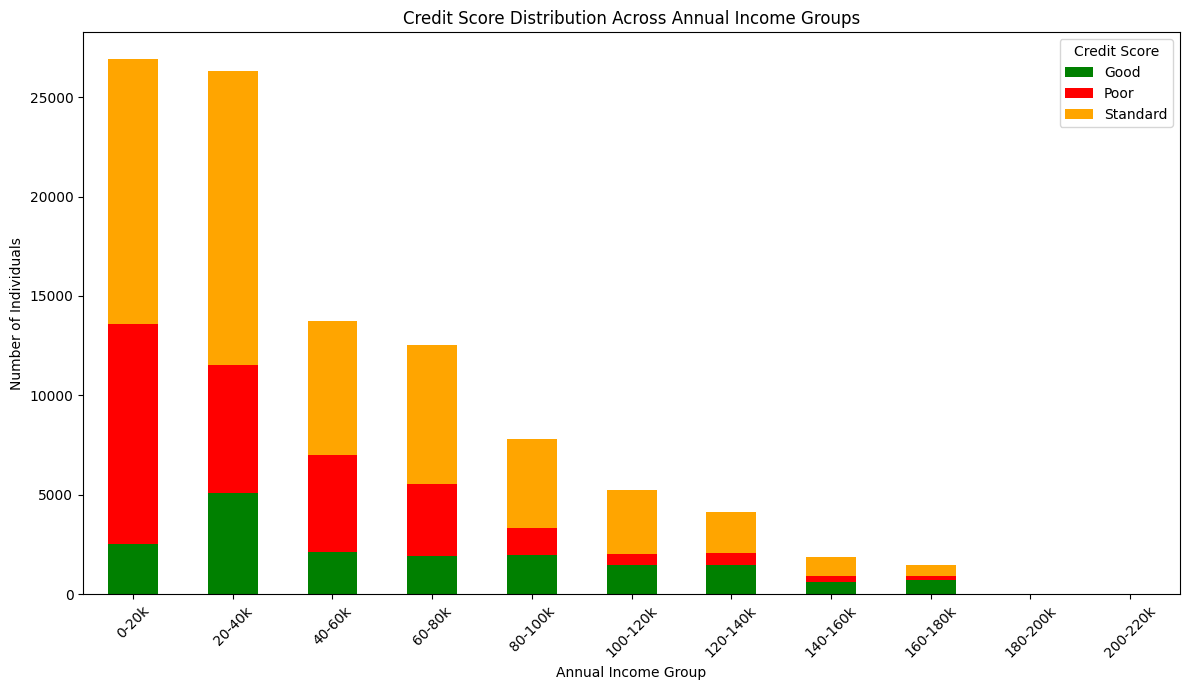

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the income bins and labels for the groups
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000]
income_labels = ['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100-120k', '120-140k', '140-160k', '160-180k', '180-200k', '200-220k']

# Categorize the annual income into discrete groups
df['IncomeGroup'] = pd.cut(df['Annual_Income'], bins=income_bins, labels=income_labels, right=False)

# Aggregate the data by 'IncomeGroup' and 'CreditScore'
income_credit_grouped = df.groupby(['IncomeGroup', 'Credit_Score']).size().unstack(fill_value=0)

# Define custom colors for the credit score categories
colors = ['green', 'red', 'orange']  # Good, Poor, Standard

# Plotting the stacked bar chart with custom colors
income_credit_grouped.plot(kind='bar', stacked=True, color=colors, figsize=(12, 7))
plt.title('Credit Score Distribution Across Annual Income Groups')
plt.xlabel('Annual Income Group')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Credit Score')
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()


In [19]:
import dash
from dash import html, dcc, callback, Input, Output
import plotly.graph_objs as go
import pandas as pd

# Adjust the income bins and labels
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, np.inf]
income_labels = ['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100-120k', '120-140k', '140-160k', '160k+']

# Categorize the annual income into discrete groups
df['IncomeGroup'] = pd.cut(df['Annual_Income'], bins=income_bins, labels=income_labels, right=False)

# Aggregate the data by 'IncomeGroup' and 'CreditScore'
income_credit_grouped = df.groupby(['IncomeGroup', 'Credit_Score']).size().unstack(fill_value=0)

# Now, use 'income_credit_grouped' for plotting in your Dash app


# Initialize the Dash app
app = dash.Dash(__name__)

# Dash app layout
app.layout = html.Div([
    dcc.Dropdown(
        id='category-dropdown',
        options=[
            {'label': 'Annual Income Group', 'value': 'income'},
            {'label': 'Age Group', 'value': 'age'},
            {'label': 'Occupation', 'value': 'occupation'}
        ],
        value='income'  # default value
    ),
    dcc.Graph(id='stacked-barchart')
])

def create_plotly_stacked_bar_chart(dataframe, colors):
    fig = go.Figure()

    # Calculate the total for each group (row)
    total_per_group = dataframe.sum(axis=1)

    for col in dataframe.columns:
        if col in colors:
            color = colors[col]
        else:
            color = 'grey'

        # Calculate the percentage
        percentage = (dataframe[col] / total_per_group) * 100

        # Adding the trace
        fig.add_trace(go.Bar(
            x=dataframe.index,
            y=dataframe[col],
            name=col,
            marker=dict(color=color),
            hovertemplate='%{y} (' + percentage.apply(lambda x: '{0:1.2f}%'.format(x)) + ')<extra></extra>',  # Custom hover text
        ))

    fig.update_layout(
        barmode='stack',
        xaxis=dict(title='Category'),
        yaxis=dict(title='Number of Individuals'),
        legend_title='Credit Score'
    )
    return fig


# Callback for updating the barchart
@app.callback(
    Output('stacked-barchart', 'figure'),
    [Input('category-dropdown', 'value')]
)
def update_graph(selected_category):
    colors = {'Good': 'green', 'Poor': 'red', 'Standard': 'orange'}

    if selected_category == 'income':
        # Prepare data for Income Group Plot
        income_credit_grouped = df.groupby(['IncomeGroup', 'Credit_Score']).size().unstack(fill_value=0)
        return create_plotly_stacked_bar_chart(income_credit_grouped, colors)
    elif selected_category == 'age':
        # Prepare data for Age Group Plot
        age_credit_grouped = df.groupby(['AgeGroup', 'Credit_Score']).size().unstack(fill_value=0)
        return create_plotly_stacked_bar_chart(age_credit_grouped, colors)
    else:
        # Prepare data for Occupation Plot
        occupation_credit_grouped = df.groupby(['Occupation', 'Credit_Score']).size().unstack(fill_value=0)
        return create_plotly_stacked_bar_chart(occupation_credit_grouped, colors)

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


C:\Users\20203672\AppData\Local\Temp\ipykernel_17048\1360347682.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\20203672\AppData\Local\Temp\ipykernel_17048\1360347682.py:79: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\20203672\AppData\Local\Temp\ipykernel_17048\1360347682.py:83: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

